## 🕹️ 머신러닝 기초학습
---
#### 다음 내용은 '혼자 공부하는 머신러닝'에 대한 내용입니다.
&nbsp;
##### [프로그램 분석]
    - 과적함 방지, 콜백 함수 대해서 학습합니다.

In [79]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras

In [80]:
# 데이터 전처리를 일단 진행해보죠.
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,
                                                                      train_target,
                                                                      test_size=0.2,
                                                                      random_state=42)

In [81]:
# 직접 모델을 만드는 것은 귀찮으니, 함수를 만들어서 사용하죠.
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [82]:
# 함수를 사용해도 정상적으로 모델이 구축되네요.
model = model_fn()
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# verbose는 훈련 상황을 알려주는건데, verbose=0으로 설정하면 초록색 진행바가 사라집니다.
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [84]:
# history에는 정확도, 손실 값들이 저장됩니다.
print(history.history.keys())
print(history.history.values())
print(history.history)

dict_keys(['accuracy', 'loss'])
dict_values([[0.8112708330154419, 0.8611666560173035, 0.8737083077430725, 0.8803125023841858, 0.8866249918937683], [0.53188157081604, 0.3885422646999359, 0.3493839502334595, 0.3285544514656067, 0.3139168620109558]])
{'accuracy': [0.8112708330154419, 0.8611666560173035, 0.8737083077430725, 0.8803125023841858, 0.8866249918937683], 'loss': [0.53188157081604, 0.3885422646999359, 0.3493839502334595, 0.3285544514656067, 0.3139168620109558]}


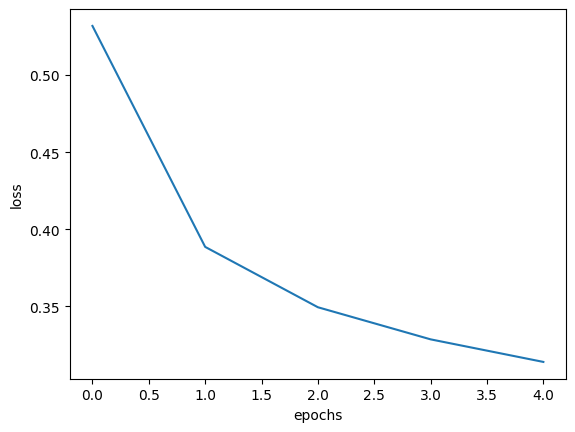

In [85]:
# 손실값에 대한 그래프를 그려보죠.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

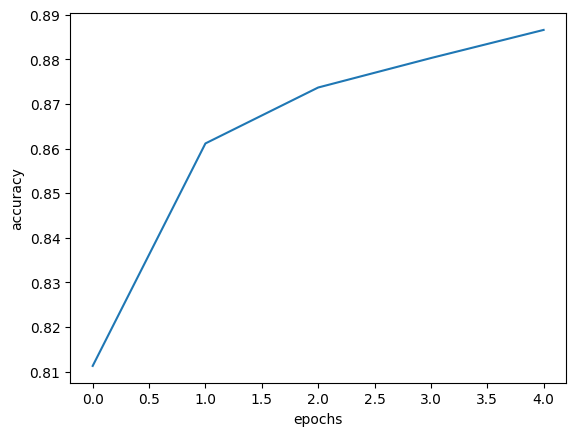

In [86]:
# 정확도에 대한 그래프도 그려보죠.
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [87]:
# 확실히 epoch의 값이 커질때마다 정확도나, 손실이 줄어드네요.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 그렇다면 epoch를 늘려볼까요? 20으로 늘려볼게요.
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

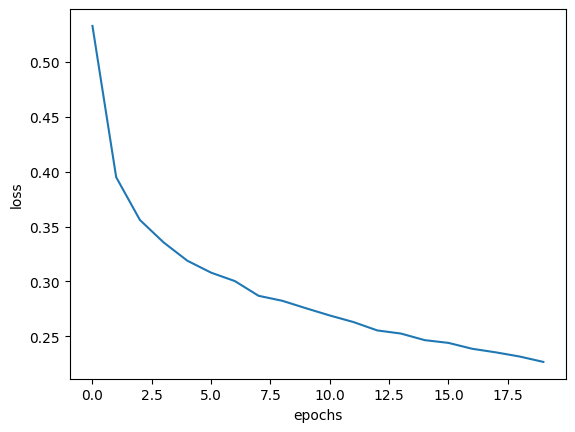

In [88]:
# epoch를 늘렸더니 확실히 손실 값이 줄어드네요!
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [89]:
# 훈련을 시킬때, 검증 데이터를 넣어서 할 수 있습니다.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [90]:
# 기존에는 정확도와 손실값만 있었는데 검증데이터에 대한 정확도와 손실값이 추가되었네요.
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


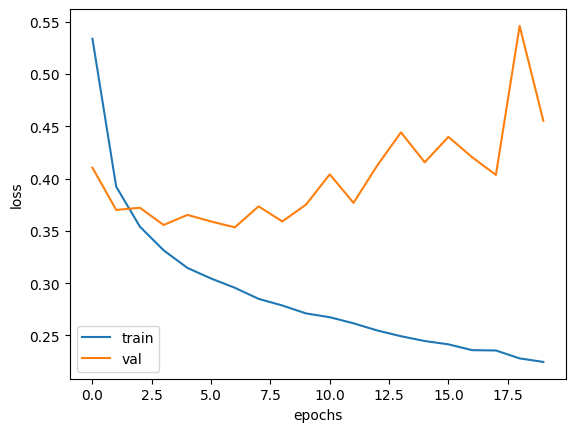

In [91]:
# 훈련데이터와 손실데이터의 손실값에 대한 그래프를 그려볼게요.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [92]:
# 혹시 뭔가 이상한거 보이시나요?
# 분명, 훈련데이터의 손실값은 계속 줄어드는데 검증 데이터에 대한 손실값은 줄어들다가 다시 커지네요?
# 아하! 그러면 이 모델은 훈련데이터에 과적합되어있겠군요.

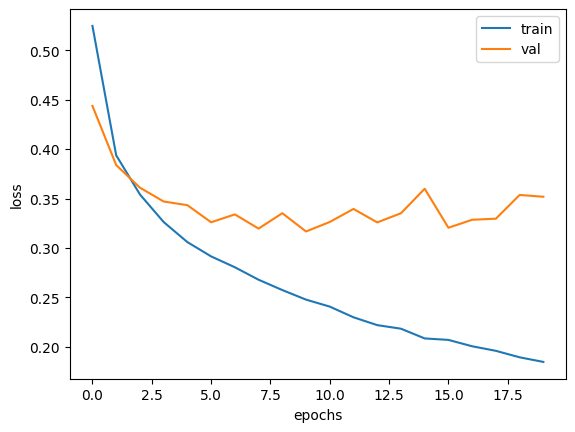

In [93]:
# 과적합을 방지하고자, 규제를 넣어줄게요. optimizer을 adam으로 설정하고, 훈련시켜볼게요.
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [94]:
# 확실히 검증 데이터의 손실값이 괜찮아진 것 같네요.
# 하지만, 안심할게 아니죠? 아직 훈련데이터 손실과는 차이가 좀 나는것 같군요.

In [95]:
# 과적합을 방지하기 위해서 keras에서는 Dropout을 지원합니다.
# Dropout을 사용하면, 특정 뉴런을 무작위로 선택하여 비활성화시켜서 과적합을 방지하게 합니다.
# 뉴런의 30%를 무작위로 비활성화시킨다는 의미입니다.
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
# 훈련데이터에 대해서는 Dropout을 적용시켜 훈련시킨다해도 검증 데이터와 평가 데이터에 대해서는 Dropout을 적용시키면 안되겠죠?
# 최적의 성능을 내야하니깐요. keras에서는 자동으로 검증, 평가 데이터에 대해서는 Dropout을 적용시키지 않습니다.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

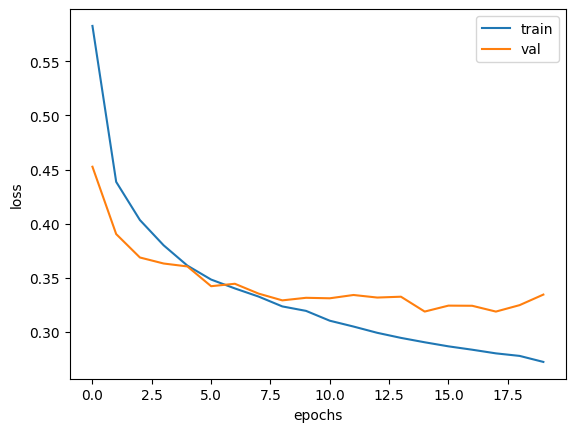

In [97]:
# 오 확실히, 처음, 전 모델보다 좋아진 모습이 보이죠?
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [98]:
# 이렇게 훈련시킨 모델을 저장시켜볼게요.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [99]:
# 모델 전체 저장
model.save('model-whole.h5')

In [100]:
# 모델 가중치 저장
model.save_weights('model-weights.weights.h5')

In [101]:
# .h5인 파일 찾기
!ls -al *.h5

-rw-r--r--  1 hack  staff  976600 11 21 14:55 model-weights.weights.h5
-rw-r--r--  1 hack  staff  978584 11 21 14:54 model-whole.h5


In [102]:
# 모델의 가중치를 불러올때는, save_weights의 반대인 load_weights를 사용하면 됩니다.
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.weights.h5')

In [109]:
# 여기서 argmax가 뭔지 궁금하실꺼에요.
# argmax와 max의 차이를 알려드릴게요. argmax는 값이 가장 큰 값의 위치를 반환하고, max는 값이 가장 큰 값을 반환합니다.
import numpy as np
# val_scaled의 모양이 기억나시나요? 12000개의 데이터가 있는데요?
# 12000개의 데이터가 10개의 값으로 분류가 되잖아요? 그래서 model.predict를 사용한 값은 12000, 10개의 행렬로 이루어져있습니다.
print('검증 데이터의 모양 : {}'.format(val_scaled.shape))
# 12000개에 대한 10개의 확률에 대해서 가장 높은 값의 위치를 알려주는거죠.
val_labels = np.argmax(model.predict(val_scaled), axis=1)
# val_labels와 val_target를 같다고 두면, 같으면 True, 다르면 False로 두겠죠?
print(np.mean(val_labels==val_target))

검증 데이터의 모양 : (12000, 28, 28)
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
0.8805833333333334


In [110]:
# val_target과 val_labels를 같다고 두었을때, True와 False의 비율을 볼게요.
np.unique(val_target==val_labels, return_counts=True)

(array([False,  True]), array([ 1433, 10567]))

In [112]:
# False인 경우가 1433개, True인 경우가 10567이죠?
# 이 말의 의미는 12000개의 데이터 중에서 10567개의 데이터가 일치한다는 것이고, 이는 정확도를 의미합니다.
# 그렇다면 아래의 값은 아까의 값과 같겠죠?
10567/12000

0.8805833333333334

In [115]:
# 이제 모델 자체를 불러올게요.
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target, verbose=0)

# 그럼 여기서 궁금증을 가지겠죠? weights만 가져오는 경우와 모델을 가져오는 경우는 어떤게 다르냐구요?
# weights를 가져오는 경우 compile을 시켜야해서 번거롭죠. 그래서 이전에는 model.predict를 사용해서 예측을 했습니다.
# 만약 evaluate를 사용하고 싶다면 compile을 거쳐야하겠죠?
# 하지만 모델 자체를 불러오면, compile을 할 필요 없이 evaluate가 가능하다는점, 기억하세요.

[0.3272363245487213, 0.8805833458900452]

In [70]:
# checkpoint_cb라는게 새로 생겼죠? 체크포인트 콜백이라는 건데, 체크포인트 콜백은 각 에포크마다의 값들을 저장합니다.
# save_best_only의 값은 성능이 가장 좋은 데이터만 저장하겠다는 의미입니다.
# 그리고 훈련을 할때, callbacks에 리스트를 사용해서 해당 리스트 안에 콜백 함수들을 넣으면 됩니다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                               save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [121]:
# 이렇게 저장한 모델을 불러올 수 있습니다.
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.8867 - loss: 0.3129


[0.3160582482814789, 0.8859999775886536]

In [122]:
# 만약, epoch를 반복하다가 어느 순간에는 값이 떨어지고, 어떤 순간에는 값이 오르겠죠?
# loss에서는 값이 떨어져야 좋은건데, 값이 오르는 순간은 과적합이 된다는 의미겠죠?
# 이 상태를 저장할 수 있는게 콜백함수 중에서 EarlyStopping입니다.
# 아무리 epochs의 값을 크게 설정해도 값에 특이점이 생기는 곳에서 학습을 멈추죠.
# 하지만, 가끔씩 값이 잠깐 올라가는 부분도 있을 수 있겠죠? 그 한계를 2로 두는겁니다. (patience)

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                               save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [123]:
# 몇번의 epoch에서 멈췄을까요?
print(early_stopping_cb.stopped_epoch)

12


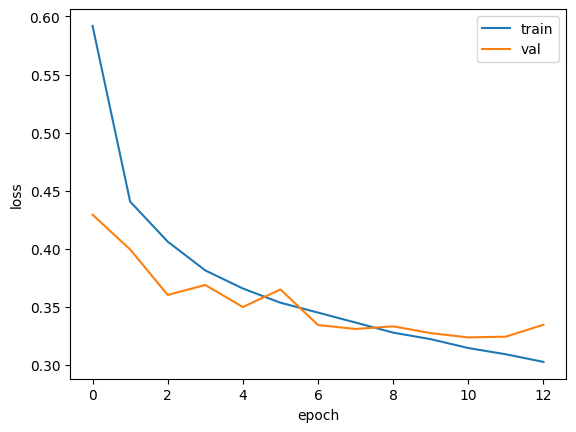

In [124]:
# 12번만에 멈췄군요!
# 그래프를 한번 그려볼게요. 아마 최적의 epoch는 10이 되겠네요.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [125]:
# 우리가 할 수 있는 최선입니다!
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.8820 - loss: 0.3249


[0.32380229234695435, 0.8821666836738586]